In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from tabulate import tabulate

In [3]:
df =pd.read_csv(r"US_youtube_trending_data.csv")
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
# Get the names and num of  all columns
num_columns = len(df.columns)
column_names = df.columns.tolist()
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")

# Get the  num of  all rows
num_rows = len(df)

print(f"Number of rows: {num_rows}")

Number of columns: 16
Column names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Number of rows: 248387


In [4]:
# Check for NaN values in the columns used for plotting
print(df[['channelTitle', 'view_count', 'likes', 'dislikes', 'comment_count',]].isnull().sum())


channelTitle     0
view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64


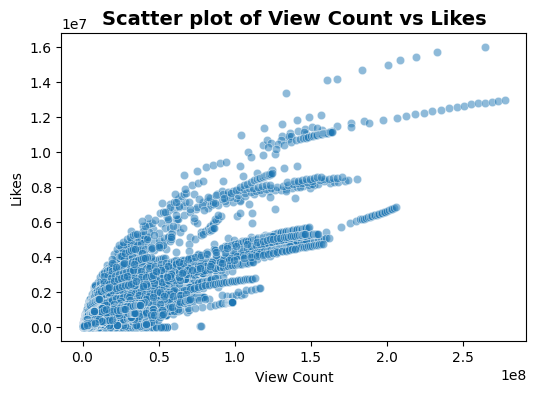

In [5]:
#Identify outliers in view counts, likes,  Investigate what makes these videos stand out.
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = detect_outliers(df, 'view_count')  # Change 'view_count' to 'likes' or 'comment_count' as needed


# Scatter plot to explore outliers in more detail
plt.figure(figsize=(6, 4))
sns.scatterplot(x='view_count', y='likes', data=df, alpha=0.5)
plt.title('Scatter plot of View Count vs Likes', fontsize=14, fontweight='bold')
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.show()





<function matplotlib.pyplot.show(close=None, block=None)>

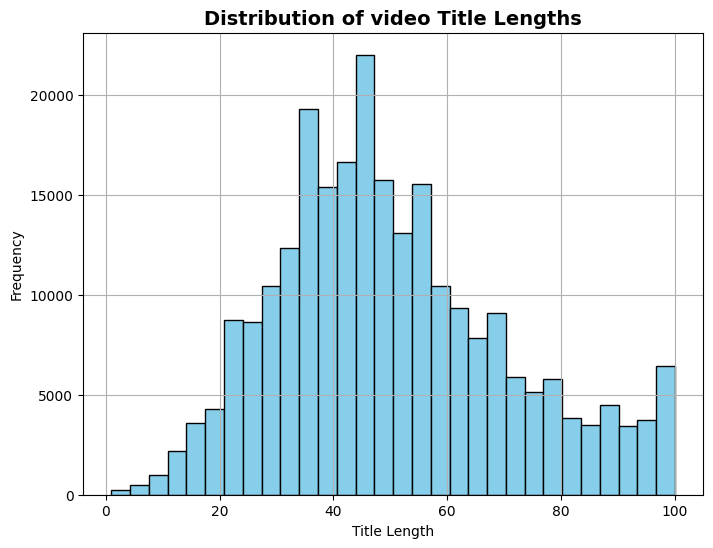

In [18]:
#Video Title Length: Distribution of video title lengths and its impact on views.
df["Title_Lenght"] = df["title"].apply(lambda x: len(x))#Video Title Length: Distribution of video title lengths and its impact on views.
df["Title_Lenght"] = df["title"].apply(lambda x: len(x))
#plotting the 
plt.figure(figsize=(8,6))
plt.hist(df["Title_Lenght"], bins=30, color="skyblue", edgecolor='black')
plt.title ('Distribution of video Title Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show

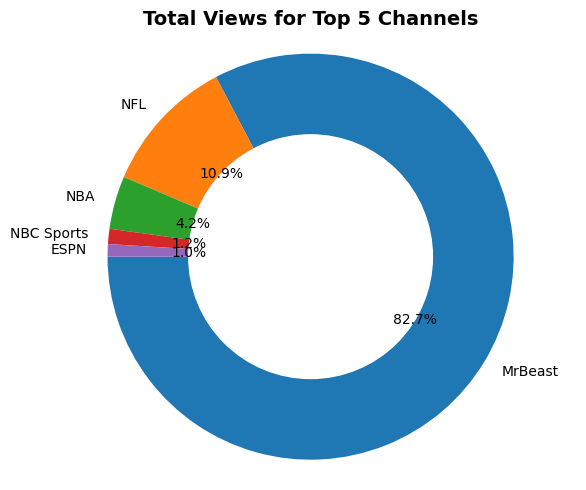

In [14]:
top_5_channels = df['channelTitle'].value_counts().head(5).index.tolist()

# Filter the DataFrame for the top 5 channels
top_5_data = df[df['channelTitle'].isin(top_5_channels)]

# Calculate total views for each channel
views_by_channel = top_5_data.groupby('channelTitle')['view_count'].sum().sort_values(ascending=False)

# Create a donut chart
plt.figure(figsize=(6, 5))
plt.pie(views_by_channel, labels=views_by_channel.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.tab10.colors)
circle = plt.Circle((0, 0), 0.6, color='white')  # Adding a white circle to create the donut chart
plt.gca().add_artist(circle)
plt.title('Total Views for Top 5 Channels', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

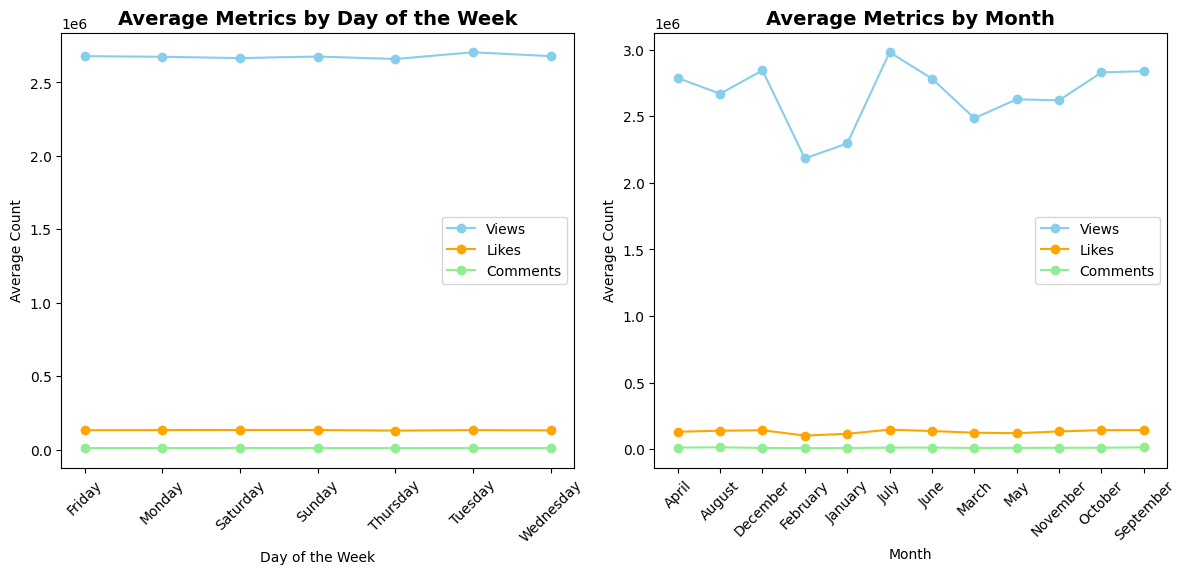

In [15]:
data=df
#Analysis of views, likes, and comments based on the day of the week or time of the year when the video was published.
data['trending_date'] = pd.to_datetime(data['trending_date'])

# Extracting day of the week and month from 'trending_date'
data['publish_day'] = data['trending_date'].dt.day_name()
data['publish_month'] = data['trending_date'].dt.month_name()

# Grouping data by day of the week and month and calculating average views, likes, and comments
day_stats = data.groupby('publish_day').agg({'view_count': 'mean', 'likes': 'mean', 'comment_count': 'mean'}).reset_index()
month_stats = data.groupby('publish_month').agg({'view_count': 'mean', 'likes': 'mean', 'comment_count': 'mean'}).reset_index()

# Plotting views, likes, and comments by day of the week as line charts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(day_stats['publish_day'], day_stats['view_count'], marker='o', linestyle='-', color='skyblue', label='Views')
plt.plot(day_stats['publish_day'], day_stats['likes'], marker='o', linestyle='-', color='orange', label='Likes')
plt.plot(day_stats['publish_day'], day_stats['comment_count'], marker='o', linestyle='-', color='lightgreen', label='Comments')
plt.title('Average Metrics by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)

# Plotting views, likes, and comments by month as line charts
plt.subplot(1, 2, 2)
plt.plot(month_stats['publish_month'], month_stats['view_count'], marker='o', linestyle='-', color='skyblue', label='Views')
plt.plot(month_stats['publish_month'], month_stats['likes'], marker='o', linestyle='-', color='orange', label='Likes')
plt.plot(month_stats['publish_month'], month_stats['comment_count'], marker='o', linestyle='-', color='lightgreen', label='Comments')
plt.title('Average Metrics by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


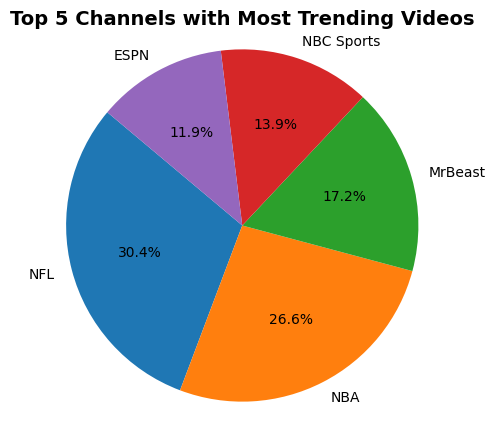

In [6]:
#  top5 channels  with most  trending videos
trending_videos_count = df.groupby('channelTitle')['video_id'].count().sort_values(ascending=False)

# Select top 5 channels with most trending videos
top_5_trending = trending_videos_count.head(5)

# Create a pie chart for top 5 channels with most trending videos
plt.figure(figsize=(5, 5))
plt.pie(top_5_trending, labels=top_5_trending.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Channels with Most Trending Videos', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:
df=data 
# info the  top 15 channels
top_15_channels = df['channelTitle'].value_counts().head(15).index.tolist()

# Filter the DataFrame for the top 15 channels
top_15_data = df[df['channelTitle'].isin(top_15_channels)]

# Calculate counts for each metric for the top 15 channels
summary_table = top_15_data.groupby('channelTitle').agg({
    'likes': 'sum',
    'dislikes': 'sum',
    'comment_count': 'sum',
    'view_count': 'sum',
    'trending_date': 'count'
}).reset_index()

summary_table.columns = ['Channel', 'Total Likes', 'Total Dislikes', 'Total Comments', 'Total Views', 'Number of Trending Videos']

# Sort the summary_table DataFrame by 'Total Views' column in ascending order
summary_table_sorted = summary_table.sort_values('Number of Trending Videos', ascending=False)

# Print the sorted table using tabulate 
print(tabulate(summary_table_sorted, headers='keys', tablefmt='pretty'))

+----+----------------------+-------------+----------------+----------------+-------------+---------------------------+
|    |       Channel        | Total Likes | Total Dislikes | Total Comments | Total Views | Number of Trending Videos |
+----+----------------------+-------------+----------------+----------------+-------------+---------------------------+
| 10 |         NFL          |  193918354  |     991318     |    17047452    | 8304346316  |           1635            |
| 8  |         NBA          |  35746153   |     537090     |    5707709     | 3223624343  |           1431            |
| 6  |       MrBeast        | 3000590638  |    6284115     |   113228767    | 63216098082 |            924            |
| 9  |      NBC Sports      |  13017747   |     176997     |    1562439     |  921849935  |            751            |
| 2  |         ESPN         |  10846342   |     552239     |    2696447     |  759185720  |            643            |
| 1  |     Dude Perfect     |  180097584